Date:  03/17//2025      
Author:  Mercy Amankwah      
Purpose:  Initial Model Exploration for the Kaggle Alzheimers' dataset. 

In [1]:
#data handling and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
## Spliting the training dataset
from sklearn.model_selection import train_test_split

In [2]:
#load and split data
df_train = pd.read_csv("../data/kaggle_train.csv") 
df_train_xgb = df_train.drop(columns=['DoctorInCharge'])
y = df_train_xgb.Diagnosis
X = df_train_xgb.drop(columns=['Diagnosis'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## **Introduction**
The models we explore in this notebook are: 
1. Logistic Regression
2. Gradient Boosting classifier
3. Adaptive Boosting classifier
4. Random Forest classifier
5. Extreme Gradient Boosting (XGBoost) classifier

In [3]:
#importing libraries for models to explore and error metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, classification_report


mse = {}
accuracy = {}
f1 = {}
models  = {
   # 'lr' : LogisticRegression(max_iter = 200),
    'gbc' : GradientBoostingClassifier(),
    'xgbc' : XGBClassifier(),
    'rfc'  :  RandomForestClassifier(random_state=42),
    'adbc' : AdaBoostClassifier()
}

### **Comparing across models for all features**

In [4]:
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    mse[name] = mean_squared_error(y_val,y_pred)
    accuracy[name] = accuracy_score(y_val, y_pred)
    #f1[name] = f1_score(y_val, y_pred, average = 'weighted')



In [5]:
print('mean squared errors:\n',mse,'\n\n accuracies\n:', accuracy)#, '\n\n F1 scores:\n', f1)
#print(f"mean squared erros: {mse:.4f}")

mean squared errors:
 {'gbc': 0.0377906976744186, 'xgbc': 0.0436046511627907, 'rfc': 0.055232558139534885, 'adbc': 0.07267441860465117} 

 accuracies
: {'gbc': 0.9622093023255814, 'xgbc': 0.9563953488372093, 'rfc': 0.9447674418604651, 'adbc': 0.9273255813953488}


In [6]:
from sklearn.preprocessing import StandardScaler

# prepare standardize
scaler = StandardScaler()
scaler.fit(X)

# standardize data
X = scaler.transform(X)
X_scale_tr, X_scale_val, y_scale_tr, y_scale_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
mse_sc = {}
accuracy_sc = {}
f1_sc = {}
models  = {
    #'lr' : LogisticRegression(max_iter = 200),
    'gbc' : GradientBoostingClassifier(),
    'xgbc' : XGBClassifier(),
    'rfc'  :  RandomForestClassifier(random_state=42),
    'adbc' : AdaBoostClassifier()
}

In [8]:
for name, model in models.items():
    model.fit(X_scale_tr,y_scale_tr)
    y_pred = model.predict(X_scale_val)
    mse_sc[name] = mean_squared_error(y_scale_val,y_pred)
    accuracy_sc[name] = accuracy_score(y_scale_val, y_pred)
    #f1[name] = f1_score(y_val, y_pred, average = 'weighted')



In [9]:
print('mean squared errors:\n',mse_sc,'\n\n accuracies\n:', accuracy_sc)#, '\n\n F1 scores:\n', f1)
    #f1[name] = f1_score(y_val, y_pred, average = 'weighted')


mean squared errors:
 {'gbc': 0.0377906976744186, 'xgbc': 0.0436046511627907, 'rfc': 0.055232558139534885, 'adbc': 0.07267441860465117} 

 accuracies
: {'gbc': 0.9622093023255814, 'xgbc': 0.9563953488372093, 'rfc': 0.9447674418604651, 'adbc': 0.9273255813953488}


**I seem to be having problems with the logistic regression model so I'll explore that below**

In [10]:
lr_model = LogisticRegression()
lr_model.fit(X_scale_tr,y_scale_tr)
lr_pred = lr_model.predict(X_scale_val)
lr_mse_sc = mean_squared_error(y_scale_val, lr_pred)
lr_acc_sc = accuracy_score(y_scale_val,lr_pred)
print('mse: ', lr_mse_sc, 'accuracy: ', lr_acc_sc)

mse:  0.13953488372093023 accuracy:  0.8604651162790697


## **Comparing Model performance across various Subcategories of the features**

In [11]:
#relevant packages

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [12]:
## Reading the traning and testing datasets
df = pd.read_csv("../data/kaggle_train.csv")

## Dropping redundant columns
df = df.drop(columns = ['DoctorInCharge' , 'PatientID' ])

In [13]:
## Seperating features into subcategories

all_features = [   'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
               'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
               'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
               'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
               'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
               'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
               'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
               'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
               'Forgetfulness' , 'Diagnosis']
demo_features = ['Age', 'Gender', 'Ethnicity','EducationLevel','Diagnosis']
life_style_features = ['BMI','Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality','Diagnosis']
medic_hist_features = ['FamilyHistoryAlzheimers', 'CardiovascularDisease','Diabetes', 'Depression', 'HeadInjury', 'Hypertension','Diagnosis']
clinical_features = ['SystolicBP','DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL','CholesterolTriglycerides','Diagnosis']
cognitive_features = ['MMSE', 'FunctionalAssessment','MemoryComplaints', 'BehavioralProblems', 'ADL','Diagnosis']
symptoms_features = ['Confusion','Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks','Forgetfulness','Diagnosis']

no_cognitive = [item for item in all_features if item not in cognitive_features]
no_cognitive.append('Diagnosis')

subcategory_dict = {'all_features' : all_features,'demo':demo_features ,'lifestyle': life_style_features , 'medic' : medic_hist_features , 
                    'clinical':clinical_features , 'cognitive': cognitive_features , 'symptoms': symptoms_features , 'no_cognitive': no_cognitive}

In [14]:
## Splitting the training data to get validation data
df_train, df_test = train_test_split(df, random_state= 123 , shuffle= True,test_size=0.2, stratify=df['Diagnosis'])

### **Logistic Regression**

In [15]:
lr_pipe = Pipeline([('scale', StandardScaler()), ('lr', LogisticRegression(random_state=42))])

lr_acc_score = {}
lr_conf_matrix = {} #confusion matrix

for key in subcategory_dict:
    item = subcategory_dict[key]
    lr_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = lr_pipe.predict(df_test[item[:-1]])

    lr_acc_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    lr_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)
    
    
lr_acc_score_df = pd.DataFrame(lr_acc_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
#lr_conf_matrix_df = pd.DataFrame(lr_conf_matrix, index = [])
lr_acc_score_df



c:\Users\Mercy\.conda\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mercy\.conda\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mercy\.conda\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mercy\.conda\envs\e

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.860465,0.648256,0.648256,0.648256,0.648256,0.854651,0.648256,0.645349
Precision Score,0.760331,0.000000,0.000000,0.000000,0.000000,0.743802,0.000000,0.000000
Recall Score,0.828829,0.000000,0.000000,0.000000,0.000000,0.825688,0.000000,0.000000
F1 Score,0.793103,0.000000,0.000000,0.000000,0.000000,0.782609,0.000000,0.000000
MSE,0.139535,0.351744,0.351744,0.351744,0.351744,0.145349,0.351744,0.354651


In [31]:
'''

#plt.subplots(1,3, figsize=(14,5))

#plt.subplot(1,3,1)
#sns.heatmap(lr_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])

'''
'''
plt.subplot(1,3,2)
sns.heatmap(lr_conf_matrix["demo"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])

plt.subplot(1,3,3)
sns.heatmap(lr_conf_matrix["lifestyle"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
'''

'''
#plt.show()

plt.subplots(2,int(len(lr_conf_matrix)/2), figsize=(20,5))
for ind, key in enumerate(lr_conf_matrix):
    if ind<=3:
        plt.subplot(1,len(lr_conf_matrix),ind+1)
    else:
        plt.subplot(2,int(len(lr_conf_matrix)/2),ind+1)
    sns.heatmap(lr_conf_matrix[key], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
plt.show()

'''


'\n#plt.show()\n\nplt.subplots(2,int(len(lr_conf_matrix)/2), figsize=(20,5))\nfor ind, key in enumerate(lr_conf_matrix):\n    if ind<=3:\n        plt.subplot(1,len(lr_conf_matrix),ind+1)\n    else:\n        plt.subplot(2,int(len(lr_conf_matrix)/2),ind+1)\n    sns.heatmap(lr_conf_matrix[key], annot=True, fmt="d", cmap="Blues", xticklabels=[\'No Alzheimers\', \'Alzheimers\'], yticklabels=[\'No Alzheimers\', \'Alzheimers\'])\n    plt.xlabel("Predicted Label")\n    plt.ylabel("True Label")\n    plt.title("Confusion Matrix")\nplt.show()\n\n'

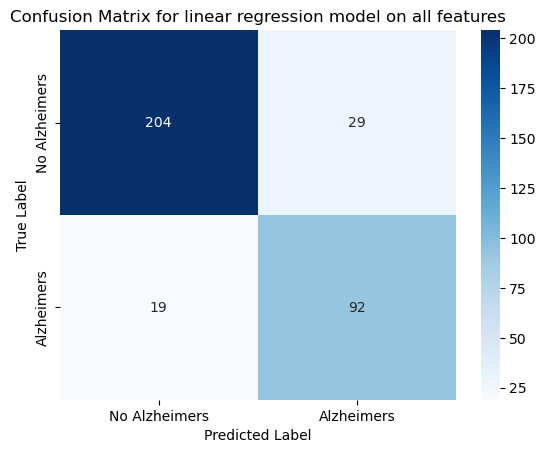

In [29]:
sns.heatmap(lr_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for linear regression model on all features")
plt.show()


### **Gradient Boosting Classifier**

In [17]:
gbc_pipe = Pipeline([('scale', StandardScaler()), ('gbc', GradientBoostingClassifier(random_state=42))])

gbc_accu_score = {}
gbc_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    gbc_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = gbc_pipe.predict(df_test[item[:-1]])

    gbc_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    gbc_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

gbc_accu_score_df = pd.DataFrame(gbc_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
gbc_accu_score_df


,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.950581,0.648256,0.639535,0.648256,0.625000,0.953488,0.639535,0.633721
Precision Score,0.925620,0.066116,0.066116,0.024793,0.123967,0.917355,0.008264,0.099174
Recall Score,0.933333,0.500000,0.421053,0.500000,0.394737,0.948718,0.200000,0.413793
F1 Score,0.929461,0.116788,0.114286,0.047244,0.188679,0.932773,0.015873,0.160000
MSE,0.049419,0.351744,0.360465,0.351744,0.375000,0.046512,0.360465,0.366279


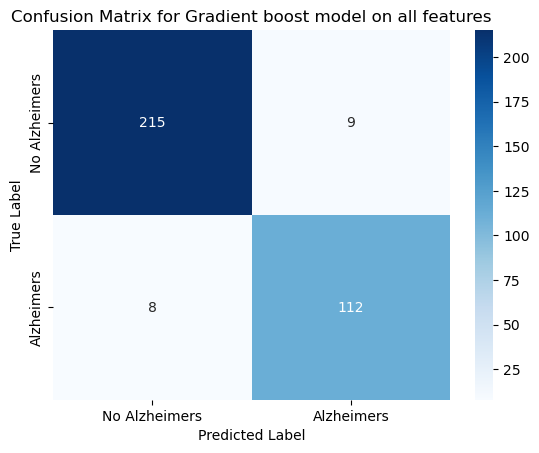

In [35]:
sns.heatmap(gbc_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gradient boost model on all features")
plt.show()

### **Adaptive Boosting Classifier**

In [45]:
adaboost_pipe = Pipeline([('scale', StandardScaler()), ('gbc', AdaBoostClassifier(random_state=42))])
adaboost_accu_score = {}
adaboost_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    adaboost_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = adaboost_pipe.predict(df_test[item[:-1]])

    adaboost_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    adaboost_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

adaboost_accu_score_df = pd.DataFrame(adaboost_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
adaboost_accu_score_df


c:\Users\Mercy\.conda\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mercy\.conda\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mercy\.conda\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mercy\.conda\envs\e

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.924419,0.648256,0.648256,0.648256,0.648256,0.936047,0.648256,0.648256
Precision Score,0.867769,0.000000,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000
Recall Score,0.913043,0.000000,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000
F1 Score,0.889831,0.000000,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000
MSE,0.075581,0.351744,0.351744,0.351744,0.351744,0.063953,0.351744,0.351744


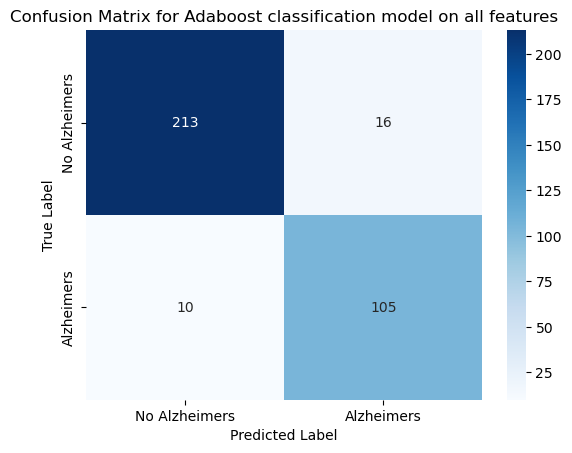

In [46]:
#Plotting confusion matrix
sns.heatmap(adaboost_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Adaboost classification model on all features")
plt.show()

### **Random Forest Classifier**

In [47]:
rfc_pipe = Pipeline([('scale', StandardScaler()), ('gbc', RandomForestClassifier(random_state=42))])
rfc_accu_score = {}
rfc_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    rfc_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = rfc_pipe.predict(df_test[item[:-1]])

    rfc_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    rfc_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

rfc_accu_score_df = pd.DataFrame(rfc_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
rfc_accu_score_df

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.936047,0.508721,0.607558,0.648256,0.610465,0.956395,0.639535,0.651163
Precision Score,0.851240,0.297521,0.074380,0.024793,0.082645,0.909091,0.008264,0.049587
Recall Score,0.962617,0.300000,0.281250,0.500000,0.303030,0.964912,0.200000,0.545455
F1 Score,0.903509,0.298755,0.117647,0.047244,0.129870,0.936170,0.015873,0.090909
MSE,0.063953,0.491279,0.392442,0.351744,0.389535,0.043605,0.360465,0.348837


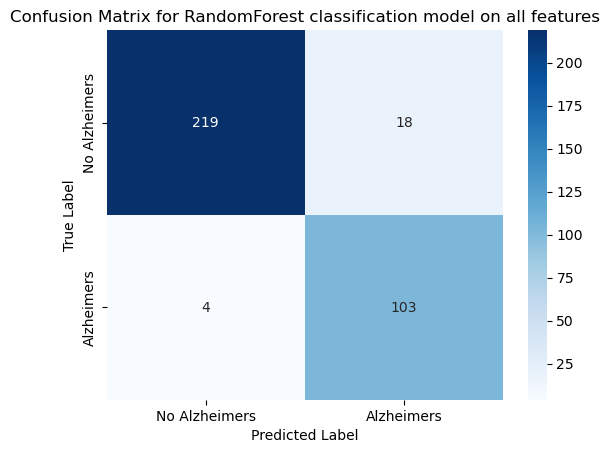

In [48]:
#Plotting confusion matrix
sns.heatmap(rfc_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for RandomForest classification model on all features")
plt.show()

### **XGBoost**

In [50]:
xgbc_pipe = Pipeline([('scale', StandardScaler()), ('gbc', XGBClassifier(random_state=42))])
xgbc_accu_score = {}
xgbc_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    xgbc_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = xgbc_pipe.predict(df_test[item[:-1]])

    xgbc_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    xgbc_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

xgbc_accu_score_df = pd.DataFrame(xgbc_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
xgbc_accu_score_df

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.950581,0.552326,0.619186,0.645349,0.595930,0.953488,0.639535,0.619186
Precision Score,0.892562,0.280992,0.264463,0.041322,0.280992,0.909091,0.008264,0.165289
Recall Score,0.964286,0.336634,0.432432,0.454545,0.395349,0.956522,0.200000,0.400000
F1 Score,0.927039,0.306306,0.328205,0.075758,0.328502,0.932203,0.015873,0.233918
MSE,0.049419,0.447674,0.380814,0.354651,0.404070,0.046512,0.360465,0.380814


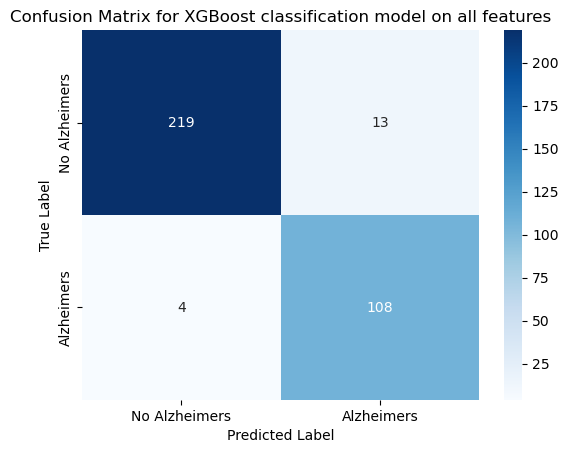

In [51]:
#Plotting confusion matrix
sns.heatmap(xgbc_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost classification model on all features")
plt.show()